# **Scaled Dot-Product Attention**

**Formula:**

$\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V$

**Where:**

- $Q, K, V$: Matrices representing query, key, and value vectors in (Query, Key, & Value space)
- $d_k$: Dimension of the keys (used for scaling)

**Why?**

To focus on the most relevant parts of the input, enabling models to handle long dependencies effectively and improve performance in sequential tasks. The scaling factor $\sqrt{d_k}$ prevents the dot products from growing too large in magnitude, leading to extremely small gradients in the softmax function.

**Terms:**

- **Query ($Q$):** What we are looking for
- **Key ($K$):** What we compare against
- **Value ($V$):** What we retrieve based on relevance

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

tokens = ['Token-1', 'Token-2', 'Token-3', 'Token-4']

# Sample token embeddings (2D vectors for simplicity)
token_embeddings = np.array([[0.9, 0.1], [0.2, 0.8],
                             [0.1, 0.9], [0.8, 0.2]])

# Simplified as identity matrices (Not training)
W_q = W_k = W_v = np.eye(2)

# Compute Query, Key, and Value matrices
Q = np.dot(token_embeddings, W_q)
K = np.dot(token_embeddings, W_k)
V = np.dot(token_embeddings, W_v)

attention_scores = np.dot(Q, K.T)
d_k = K.shape[1]
scaled_scores = attention_scores / np.sqrt(d_k)

attention_weights = (
    np.exp(scaled_scores) / 
    np.sum(np.exp(scaled_scores), 
    axis=1, keepdims=True)
)

contextualized_vectors = np.dot(attention_weights, V)

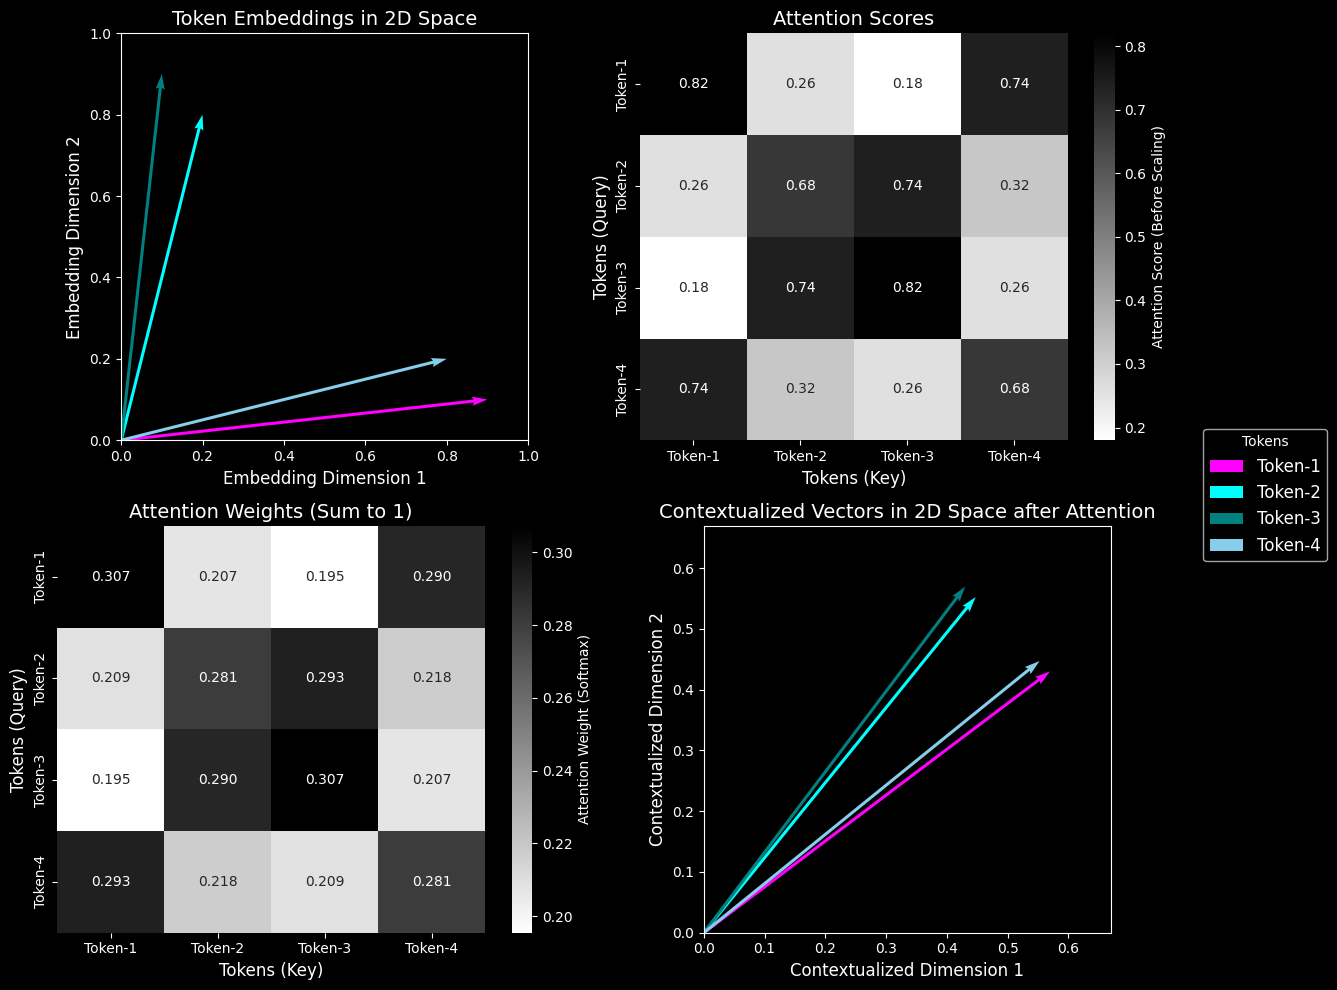

In [2]:
# Start visualization
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Distinct colors for tokens to aid visual clarity
colors = ['magenta', 'cyan', 'teal', 'skyblue']

# Plot 1: Token Embeddings in 2D
# Simplified to show raw token positions without applying transformations
ax = axs[0, 0]
for i, color in enumerate(colors):
    ax.quiver(0, 0, token_embeddings[i, 0], token_embeddings[i, 1], angles='xy', scale_units='xy', scale=1, color=color)
ax.set_xlim(0, np.max(token_embeddings[:, 0]) + 0.1)
ax.set_ylim(0, np.max(token_embeddings[:, 1]) + 0.1)
ax.set_xlabel('Embedding Dimension 1', fontsize=12)
ax.set_ylabel('Embedding Dimension 2', fontsize=12)
ax.set_title('Token Embeddings in 2D Space', fontsize=14)
ax.set_aspect('equal', 'box')

# Plot 2: Attention Scores Heatmap
# Shows raw similarity scores before scaling
ax = axs[0, 1]
sns.heatmap(
    attention_scores,
    annot=True,
    fmt=".2f",
    cmap="gray_r",
    cbar_kws={'label': 'Attention Score (Before Scaling)'},
    xticklabels=tokens,
    yticklabels=tokens,
    ax=ax
)
ax.set_xlabel('Tokens (Key)', fontsize=12)
ax.set_ylabel('Tokens (Query)', fontsize=12)
ax.set_title('Attention Scores', fontsize=14)

# Plot 3: Attention Weights Heatmap
# Highlights how softmax normalizes scores into interpretable weights
ax = axs[1, 0]
sns.heatmap(
    attention_weights,
    annot=True,
    fmt=".3f",
    cmap="gray_r",
    cbar_kws={'label': 'Attention Weight (Softmax)'},
    xticklabels=tokens,
    yticklabels=tokens,
    ax=ax
)
ax.set_xlabel('Tokens (Key)', fontsize=12)
ax.set_ylabel('Tokens (Query)', fontsize=12)
ax.set_title('Attention Weights (Sum to 1)', fontsize=14)

# Plot 4: Contextualized Vectors
# Depicts the final representation of tokens after applying attention
ax = axs[1, 1]
for i, color in enumerate(colors):
    ax.quiver(0, 0, contextualized_vectors[i, 0], contextualized_vectors[i, 1], angles='xy', scale_units='xy', scale=1, color=color)
ax.set_xlim(0, np.max(contextualized_vectors[:, 0]) + 0.1)
ax.set_ylim(0, np.max(contextualized_vectors[:, 1]) + 0.1)
ax.set_xlabel('Contextualized Dimension 1', fontsize=12)
ax.set_ylabel('Contextualized Dimension 2', fontsize=12)
ax.set_title('Contextualized Vectors in 2D Space after Attention', fontsize=14)
ax.set_aspect('equal', 'box')

# Add a common legend outside the plot
fig.legend(tokens, title="Tokens", loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

plt.tight_layout()
plt.show()